Optimized theta: [[0.18124871]
 [1.37184544]]
Final cost: 0.1698034848003809


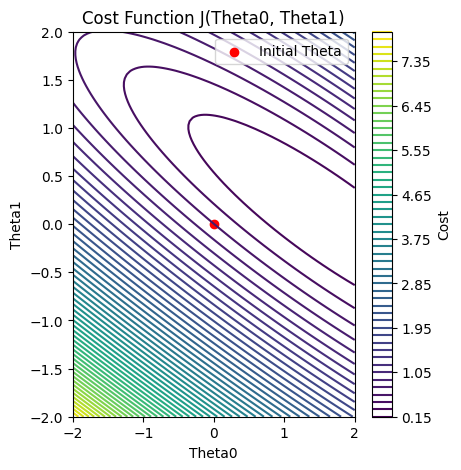

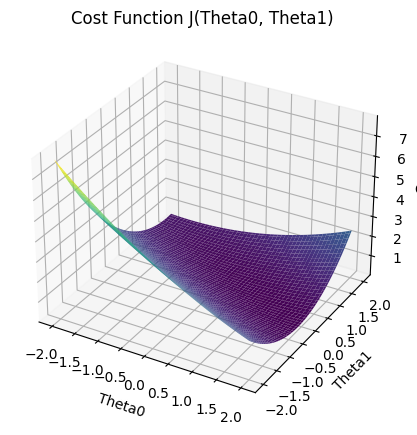

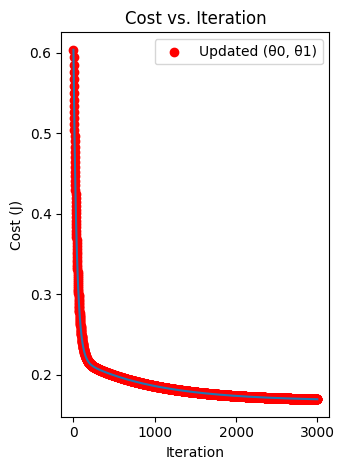

     Iteration         J    Theta0    Theta1
0            0  0.603844  0.000000  0.000000
1            1  0.594347  0.008340  0.005099
2            2  0.585084  0.016572  0.010144
3            3  0.576048  0.024697  0.015133
4            4  0.567235  0.032718  0.020069
...        ...       ...       ...       ...
2995      2995  0.169815  0.181594  1.371166
2996      2996  0.169813  0.181525  1.371302
2997      2997  0.169810  0.181456  1.371438
2998      2998  0.169808  0.181387  1.371574
2999      2999  0.169806  0.181318  1.371710

[3000 rows x 4 columns]


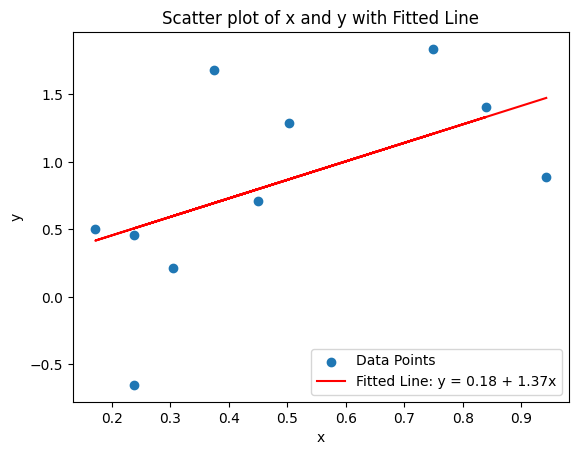

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Generate random data
x = np.random.rand(10, 1)
y = 2 * x + np.random.randn(10, 1)

# Define hypothesis function
def hypothesisFunc(theta, x):
    return np.dot(x, theta)

# Define cost function
def costFunction(theta, x, y):
    m = len(y)
    h = hypothesisFunc(theta, x)
    J = 1 / (2 * m) * np.sum((h - y) ** 2)
    return J

# Define gradient descent function
def gradientDescent(x, y, theta, alpha, num_iterations, tol=1e-6):
    m = len(y)
    J_history = []

    for _ in range(num_iterations):
        h = hypothesisFunc(theta, x)
        theta = theta - (alpha / m) * np.dot(x.T, (h - y))
        J_history.append(costFunction(theta, x, y))

        # Stopping criterion: Check if the change in cost is less than tolerance
        if len(J_history) > 1 and abs(J_history[-1] - J_history[-2]) < tol:
            break

    return theta, J_history

# Add bias term to x
x = np.hstack((np.ones((x.shape[0], 1)), x))

theta = np.zeros((2, 1))

# Set hyperparameters
alpha = 0.01
num_iterations = 3000

theta_optimized, J_history = gradientDescent(x, y, theta, alpha, num_iterations)

print("Optimized theta:", theta_optimized)
print("Final cost:", J_history[-1])

# Plotting the cost function J(θ0, θ1) and generating a table with iteration data

# Plot of J(θ0, θ1) with initial point (2d)
theta0_initial = theta[0][0]
theta1_initial = theta[1][0]

theta0_values = np.linspace(-2, 2, 100)
theta1_values = np.linspace(-2, 2, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_values, theta1_values)

J_values = np.zeros_like(theta0_grid)
for i in range(len(theta0_values)):
    for j in range(len(theta1_values)):
        J_values[i, j] = costFunction(np.array([[theta0_values[i]], [theta1_values[j]]]), x, y)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contour(theta0_grid, theta1_grid, J_values, levels=50)
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.title('Cost Function J(Theta0, Theta1)')
plt.colorbar(label='Cost')
plt.scatter(theta0_initial, theta1_initial, color='red', label='Initial Theta')
plt.legend()


# 3D plot of the cost function J(θ0, θ1)
theta0_values = np.linspace(-2, 2, 100)
theta1_values = np.linspace(-2, 2, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_values, theta1_values)

J_values = np.zeros_like(theta0_grid)
for i in range(len(theta0_values)):
    for j in range(len(theta1_values)):
        J_values[i, j] = costFunction(np.array([[theta0_values[i]], [theta1_values[j]]]), x, y)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_grid, theta1_grid, J_values, cmap='viridis')
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function J(Theta0, Theta1)')

plt.show()


# Table with J, θ0, and θ1 at each iteration
theta_optimized = np.zeros((2, 1))
theta_values = [theta.flatten().tolist()]
iteration_data = pd.DataFrame(columns=['Iteration', 'J', 'Theta0', 'Theta1'])

for i in range(num_iterations):
    h = hypothesisFunc(theta_optimized, x)
    J_iteration = costFunction(theta_optimized, x, y)
    new_row = {'Iteration': i, 'J': J_iteration, 'Theta0': theta_optimized[0][0], 'Theta1': theta_optimized[1][0]}
    iteration_data = pd.concat([iteration_data, pd.DataFrame([new_row])], ignore_index=True)
    theta_values.append(theta_optimized.flatten().tolist())
    theta_optimized, _ = gradientDescent(x, y, theta_optimized, alpha, 1)

plt.subplot(1, 2, 2)
plt.plot(iteration_data['Iteration'], iteration_data['J'])
plt.xlabel('Iteration')
plt.ylabel('Cost (J)')
plt.title('Cost vs. Iteration')
plt.scatter(iteration_data['Iteration'], iteration_data['J'], color='red', label='Updated (θ0, θ1)')
plt.legend()

plt.tight_layout()
plt.show()

print(iteration_data)



# Scatter plot of x and y with the line y = θ0 + θ1x

# Scatter plot of x and y
plt.scatter(x[:,1], y, label='Data Points')

# Calculate the y values for the line y = θ0 + θ1x
y_predicted = theta_optimized[0] + theta_optimized[1] * x[:,1]

# Plot the line
plt.plot(x[:,1], y_predicted, color='red', label='Fitted Line: y = {:.2f} + {:.2f}x'.format(theta_optimized[0][0], theta_optimized[1][0]))

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y with Fitted Line')
plt.legend()
plt.show()


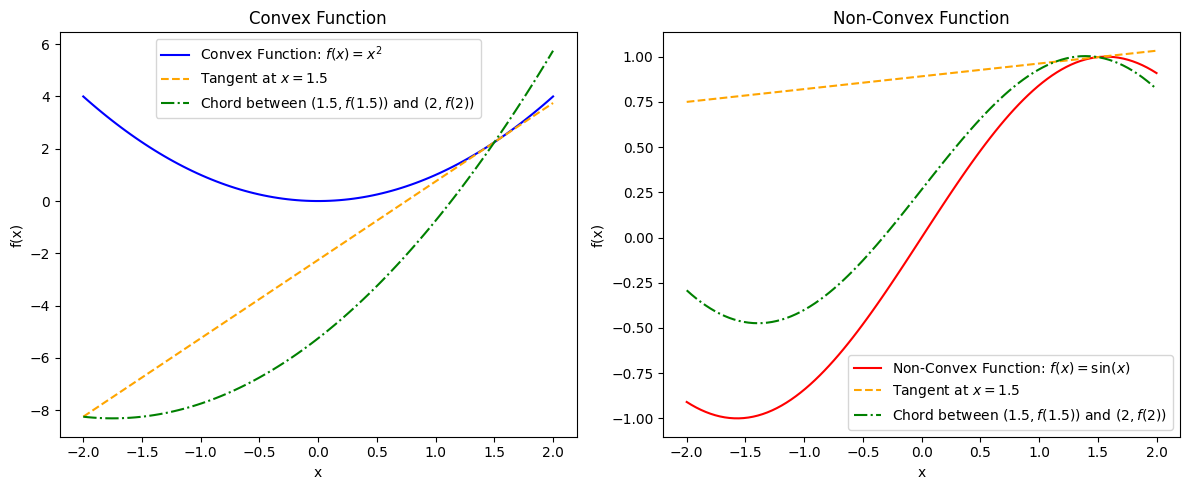

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define a convex function: f(x) = x^2
def convex_function(x):
    return x ** 2

# Define the non-convex function: f(x) = sin(x)
def non_convex_function(x):
    return np.sin(x)

# Define tangent lines at specific points
def tangent_line_convex(x, x_point):
    return 2 * x_point * (x - x_point) + convex_function(x_point)

def tangent_line_non_convex(x, x_point):
    return np.cos(x_point) * (x - x_point) + non_convex_function(x_point)

x_values = np.linspace(-2, 2, 100)

y_convex = convex_function(x_values)

y_non_convex = non_convex_function(x_values)

# Choose points for tangent lines
x_point_convex = 1.5
x_point_non_convex = 1.5

# Calculate tangent lines
tangent_convex = tangent_line_convex(x_values, x_point_convex)
tangent_non_convex = tangent_line_non_convex(x_values, x_point_non_convex)

# Calculate chord lines
chord_convex = convex_function(x_values) + (x_values - x_point_convex) * (convex_function(2) - convex_function(x_point_convex)) / (2 - x_point_convex)
chord_non_convex = non_convex_function(x_values) + (x_values - x_point_non_convex) * (non_convex_function(2) - non_convex_function(x_point_non_convex)) / (2 - x_point_non_convex)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_values, y_convex, color='blue', label='Convex Function: $f(x) = x^2$')
plt.plot(x_values, tangent_convex, linestyle='--', color='orange', label='Tangent at $x=1.5$')
plt.plot(x_values, chord_convex, linestyle='-.', color='green', label='Chord between $(1.5, f(1.5))$ and $(2, f(2))$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Convex Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_values, y_non_convex, color='red', label='Non-Convex Function: $f(x) = \sin(x)$')
plt.plot(x_values, tangent_non_convex, linestyle='--', color='orange', label='Tangent at $x=1.5$')
plt.plot(x_values, chord_non_convex, linestyle='-.', color='green', label='Chord between $(1.5, f(1.5))$ and $(2, f(2))$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Non-Convex Function')
plt.legend()

plt.tight_layout()
plt.show()
